In [1]:

import pandas as pd
import numpy as np
import glob
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import json
from math import sin, cos
from glob import glob
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
from torchvision.transforms.autoaugment import AutoAugmentPolicy
import pickle
from skimage.transform import rotate
from skimage.transform import rescale, resize, downscale_local_mean

import cv2
from PIL import Image

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
device='cuda:3'

In [4]:
models.resnext50_32x4d()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

## Датасет


In [8]:
from math import sin, cos


img_dir = "data\\train_ext\\img\\*.png"
json_dir = "data\\train_ext\\json\\"

In [9]:
data_df = pd.DataFrame({'id': [], "left_top_x": [], 'left_top_y': [], "right_bottom_x": [], 'right_bottom_y': [], 'angle': []})

In [10]:
json_true = []
for path in sorted(glob(img_dir)):
        x = path.split('\\')[-1].split('.')[-2]
        x = str(int(x))+'.json'
        data = json.load(open(json_dir + x))
        s = 724
        new_row = {'id':x.split(".")[0]+".png", 'left_top_x':data["left_top"][0], 'left_top_y':data["left_top"][1], 'right_bottom_x': data["right_bottom"][0], "right_bottom_y": data["right_bottom"][1], 'angle': data["angle"]}
        data_df = data_df.append(new_row, ignore_index=True)

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_row, ignore_index=True)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2770887507.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(new_

In [11]:
data_df.shape

(1660, 6)

In [12]:
class ImageDatasetTrig(Dataset):
    def __init__(self, data_df, transform=None, device='cuda:0', scale=2):
        self.data_df = data_df
        self.scale = scale
        self.device = device
        self.transform = transform
    def __getitem__(self, idx):
        image_name, labels, true_ang = self.data_df.iloc[idx]['id'], \
                                        [self.data_df.iloc[idx]['left_top_x']/10496, 
                                         self.data_df.iloc[idx]['left_top_y']/10496, 
                                         self.data_df.iloc[idx]['right_bottom_x']/10496, 
                                         self.data_df.iloc[idx]['right_bottom_y']/10496, 
                                         np.sin(self.data_df.iloc[idx]['angle']/180*np.pi)],\
                                        self.data_df.iloc[idx]['angle']

        ind = int(image_name.split('.')[-2])
        
        image = cv2.imread(f"data\\train_ext\\img\\{image_name}")
        #print(f"data\\train_ext\\img\\{image_name}")
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (image.shape[0]//self.scale, image.shape[1]//self.scale), cv2.INTER_CUBIC)
        orig_img = image
        image = Image.fromarray(image)
        if self.transform:
            image = self.transform(image)
        
        return orig_img, image.float().to(self.device), torch.tensor(labels).float().to(self.device), true_ang
    
    def __len__(self):
        return len(self.data_df)

In [13]:

train_transform = transforms.Compose([
    #transforms.RandomResizedCrop(224),
    #transforms.Resize(256),
    transforms.AutoAugment(policy=AutoAugmentPolicy.IMAGENET),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

valid_transform = transforms.Compose([
    #transforms.RandomResizedCrop(224),
    #transforms.Resize(256),
    #transforms.AutoAugment(policy=AutoAugmentPolicy.IMAGENET),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

In [14]:
#data_df = pd.read_csv("data/train.csv")

In [15]:
scale = 4

In [16]:
orig = cv2.imread('data/new_orig_02_4.png')
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

In [17]:
from os import listdir

print("Обучающей выборки " ,len(listdir("data\\train_ext\\img")))
print("Тестовой выборки " ,len(listdir("data\\test\\img")))

Обучающей выборки  1660
Тестовой выборки  400


In [18]:
# разделим датасет на трейн и валидацию, чтобы смотреть на качество
train_df, valid_df = train_test_split(data_df, test_size=0.1, random_state=43)

In [19]:
train_df.shape, valid_df.shape

((1494, 6), (166, 6))

In [20]:
train_dataset = ImageDatasetTrig(train_df, transform=train_transform, device=device, scale=scale)
valid_dataset = ImageDatasetTrig(valid_df, transform=valid_transform, device=device, scale=scale)

In [21]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=16,
                                           shuffle=True,
                                           #pin_memory=True,
                                           num_workers=0)

valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset,
                                           batch_size=16,
                                           # shuffle=True,
                                          # pin_memory=True,
                                           num_workers=0)

## Вспомогательные функции

In [22]:
def metric(data_true, data_pred, angle_true, angle_pred, outImageW = 10496, outImageH = 10496):
    x_center_true = np.array((data_true[0] + data_true[2])/2).astype(int)
    y_center_true = np.array((data_true[1] + data_true[3])/2).astype(int)

    x_metr = x_center_true - np.array((data_pred[0] + data_pred[2])/2).astype(int)
    y_metr = y_center_true - np.array((data_pred[1] + data_pred[3])/2).astype(int)

    metr =  1 - 0.7 * (abs(x_metr)/outImageH + abs(y_metr)/outImageW)/2 - 0.3 *min((abs(angle_true - angle_true),abs(abs(angle_true - angle_true)-360)))/360
    return metr

In [23]:
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    points = np.array(val_history)
    steps = list(range(0, len(train_history) + 1, int(len(train_history) / len(val_history))))[1:]
    
    plt.scatter(steps, val_history, marker='+', s=180, c='orange', label='val', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()

    plt.show()

In [24]:
float(torch.asin(torch.tensor(1.)))

1.5707963705062866

In [25]:
def train(res_model, criterion, optimizer, train_dataloader, test_dataloader, NUM_EPOCH=15):
    train_loss_log = []
    val_loss_log = []
    
    train_acc_log = []
    val_acc_log = []
    
    for epoch in tqdm(range(NUM_EPOCH)):
        model.train()
        train_loss = 0.
        train_size = 0
        
        train_pred = []

        for orig_img, imgs, labels, true_angles in train_dataloader:
            optimizer.zero_grad()

            imgs = imgs
            labels = labels

            y_pred = model(imgs)

            loss = criterion(y_pred, labels)
            loss.backward()
            
            train_loss += loss.item()
            train_size += y_pred.size(0)
            train_loss_log.append((loss.data.cpu().detach().numpy() / y_pred.size(0)) * 100)
            y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)
            y_pred[:, :4] = y_pred[:, :4] * 10496
            #y_pred[:, -1] = y_pred[:, -1] #* 360 + 180
            angles = torch.asin(y_pred[:, -1])/np.pi*180

            real_angles = []
            for i, angle in enumerate(angles):
                cx = np.clip(int((y_pred_1[i, 0]+y_pred_1[i, 2])/2), 1024//scale+1, 10496//scale - 1024//scale)
                cy = np.clip(int((y_pred_1[i, 1]+y_pred_1[i, 3])/2), 1024//scale+1, 10496//scale - 1024//scale)
                real_ang = real_angle(float(angle), 
                                      cx,
                                      cy,
                                      orig_img,
                                      scale)
                real_angles.append(real_ang)
            labels[:, :4] = labels[:, :4] * 10496
            #labels[:, -1] = labels[:, -1] #* 360 + 180

            for label, pr, ang_true, ang_pred in zip(labels, y_pred, true_angles, real_angles):
                    #print(label, pr)
                    metr = metric(label.cpu().detach().numpy(), pr.cpu().detach().numpy(), ang_true, ang_pred)
                    #print(metr)
                    train_pred.append(metr)

            optimizer.step()

        train_acc_log.append(train_pred)

        val_loss = 0.
        val_size = 0
        
        val_pred = []
        
        model.eval()
        
        with torch.no_grad():
            for orig_img, imgs, labels, true_angles in test_dataloader:
                
                imgs = imgs.cuda(device)
                labels = labels.cuda(device)
                
                y_pred = model(imgs)
                loss = criterion(y_pred, labels)
                
                val_size += y_pred.size(0)
                val_loss += loss.item()
                
                y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)
                y_pred[:, :4] = y_pred[:, :4] * 10496
                #y_pred[:, -1] = y_pred[:, -1] #* 360 + 180
                angles = torch.asin(y_pred[:, -1])/np.pi*180
                print('angles true', true_angles)
                
                real_angles = []
                for i, angle in enumerate(angles):
                    cx = np.clip(int((y_pred_1[i, 0]+y_pred_1[i, 2])/2), 1024//scale+1, 10496//scale - 1024//scale)
                    cy = np.clip(int((y_pred_1[i, 1]+y_pred_1[i, 3])/2), 1024//scale+1, 10496//scale - 1024//scale)
                    real_ang = real_angle(float(angle), 
                                          cx,
                                          cy,
                                          orig_img,
                                          scale)
                    real_angles.append(real_ang)
                print('angles pred', real_angles)
                labels[:, :4] = labels[:, :4] * 10496
                #labels[:, -1] = labels[:, -1] #* 360 + 180

                for label, pr, ang_true, ang_pred in zip(labels, y_pred, true_angles, real_angles):
                    #print(label, pr)
                    metr = metric(label.cpu().detach().numpy(), pr.cpu().detach().numpy(), ang_true, ang_pred)
                    #print(metr)
                    val_pred.append(metr)
                print('true labels', y_pred)
                print('pred labels', labels)
        val_loss_log.append((val_loss/ val_size)*100)
        val_acc_log.append(val_pred)

        #clear_output()
        plot_history(train_loss_log, val_loss_log, 'loss')
        


        print('Train loss:', (train_loss / train_size)*100)
        print('Val loss:', (val_loss / val_size)*100)
        print('Train metric:', (np.mean(train_pred)))
        print('Val metric:', (np.mean(val_pred)))
        
    return train_loss_log, train_acc_log, val_loss_log, val_acc_log

In [26]:
def real_angle(angle, cy, cx, patch, scale):
    #print(cx, cy)
    pad = 1024//scale//2
    patch = orig[cy-pad:cy+pad,cx-pad:cx+pad]
    patch_rot = rotate(patch, angle)
    patch_rot180 = rotate(patch, angle+180)
#         print(c_y_c_x)
#         print(patch_big.shape)
    corr1 = ((patch - patch_rot)**2).sum()
    corr2 = ((patch - patch_rot180)**2).sum()
    if corr1 < corr2:
        return angle
    else:
        return angle + 180

## Модель

In [31]:
class Resnext50(nn.Module):
    def __init__(self):
        super(Resnext50, self).__init__()
        self.resnet = models.resnext50_32x4d(pretrained=True)
        self.spat_lin = nn.Linear(1000, 5)
        #self.angle_lin = nn.Linear(1000, 1)
        
    def forward(self, x):
        x = self.resnet(x)
        x = F.relu(x)
        x = self.spat_lin(x)
        #out_angle = self.angle_lin(out_lin_1)
        x[:, 4] = F.tanh(x[:, 4])
        x[:, :4] = F.relu(x[:, :4])
        return x
        

In [32]:
torch.cuda.empty_cache()

In [33]:
device

'cuda:3'

In [34]:
torch.cuda.empty_cache()

model = Resnext50()
model = model.to(device)

E:\uhin\dev\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
E:\uhin\dev\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to C:\Users\uhin/.cache\torch\hub\checkpoints\resnext50_32x4d-7cdf4587.pth


  0%|          | 0.00/95.8M [00:00<?, ?B/s]

In [35]:
# model = Resnet50()
# model.load_state_dict(torch.load('models/wideresnet_trig_ext_relu.pt'))
# model = model.to(device)

In [36]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]E:\uhin\dev\Anaconda\lib\site-packages\torch\nn\functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2103541605.py:29: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2103541605.py:76: UserWarning: __floordiv__ is deprecated, and its behavior will change in a futu

angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [15.283283233642578, 5.653223037719727, 32.08890151977539, -12.050761222839355, 3.088200807571411, 23.832765579223633, 25.288198471069336, 15.550371170043945, 6.594607353210449, 23.988239288330078, -2.6138384342193604, -16.11504364013672, -10.71252727508545, -4.761326789855957, 15.319297790527344, -0.626513659954071]
true labels tensor([[ 8.8275e+03,  6.1921e+03,  9.3245e+03,  2.5316e+03,  2.6359e-01],
        [ 6.0128e+03,  1.1225e+04,  4.5402e+03,  8.3613e+03,  9.8507e-02],
        [ 5.1847e+03,  2.9365e+03,  3.1873e+03,  4.8045e+03,  5.3123e-01],
        [ 8.1719e+03,  8.0865e+03,  9.7392e+03,  6.4775e+03, -2.0878e-01],
        [ 4.7763e+03,  1.0128e+04,  3.6189e+03,  8.6943e+03,  5.3873e-02],
        [ 3.8570e+03,  6.0044e+03,  3.5941e+03,  4.2448e+03,  4.0407e-01],
        [ 6.2778e+03,  4.7717e+03,  6.1584e+03,  3.2503e+03, 

angles true tensor([336., 132., 140.,  88., 336., 270., 140., 256., 203., 116., 259.,  92.,
        304., 200., 313., 300.], dtype=torch.float64)
angles pred [-8.281388282775879, 3.880894899368286, -12.240267753601074, 16.956329345703125, 19.03681182861328, -14.705456733703613, 17.161514282226562, 24.531478881835938, 1.1812196969985962, -2.867751121520996, -1.7554253339767456, 7.767758369445801, 22.87793731689453, 23.609281539916992, 1.73377525806427, 12.917584419250488]
true labels tensor([[ 6.1789e+03,  1.0566e+04,  6.1789e+03,  8.0781e+03, -1.4403e-01],
        [ 8.4680e+03,  7.2933e+03,  9.9682e+03,  5.7511e+03,  6.7683e-02],
        [ 6.3486e+03,  1.4569e+04,  3.9003e+03,  8.7538e+03, -2.1201e-01],
        [ 7.4984e+03,  8.0372e+03,  7.1277e+03,  3.7297e+03,  2.9164e-01],
        [ 5.8327e+03,  3.2006e+03,  9.6277e+03,  3.0422e+03,  3.2618e-01],
        [ 8.2115e+03,  9.5298e+03,  7.2996e+03,  7.8603e+03, -2.5385e-01],
        [ 3.3328e+03,  7.0745e+03,  5.6190e+03,  5.6277e+03,  

angles true tensor([ 56.,  57., 108., 148., 112., 222., 200., 244., 316., 176., 148.,  92.,
         24., 304., 260., 304.], dtype=torch.float64)
angles pred [1.1602195501327515, 11.259404182434082, -4.634286403656006, 6.383135795593262, -4.218475818634033, -9.879117965698242, -0.1091872826218605, 6.188957691192627, 15.467145919799805, 13.611922264099121, 12.822639465332031, -4.738231658935547, -0.515964925289154, 4.129831314086914, 11.439375877380371, 12.340079307556152]
true labels tensor([[ 1.0157e+04,  8.7195e+03,  7.6833e+03,  8.7784e+03,  2.0248e-02],
        [ 5.5164e+03,  6.8249e+03,  5.3468e+03,  4.6577e+03,  1.9525e-01],
        [ 3.7670e+03,  9.4188e+03,  4.5351e+03,  9.1367e+03, -8.0795e-02],
        [ 1.3349e+04,  6.5428e+03,  1.0609e+04,  8.4259e+03,  1.1118e-01],
        [ 5.2353e+03,  1.0985e+04,  6.6429e+03,  9.8919e+03, -7.3560e-02],
        [ 5.9096e+03,  7.5333e+03,  4.8295e+03,  6.8072e+03, -1.7157e-01],
        [ 6.4857e+03,  7.9648e+03,  7.8897e+03,  7.0701e+03, 

angles true tensor([ 29., 106., 236., 307., 118., 116.,  54.,  12., 120., 240., 168., 236.,
         85., 184.,  74., 339.], dtype=torch.float64)
angles pred [9.111443519592285, 15.056316375732422, 9.946449279785156, -12.506303787231445, 0.06534019112586975, 11.199708938598633, -14.409423828125, -16.866947174072266, 6.081155776977539, 3.892575979232788, -4.6571502685546875, 21.521589279174805, 6.989767551422119, 23.540002822875977, -12.791057586669922, -13.914594650268555]
true labels tensor([[ 9.3001e+03,  5.4354e+03,  8.7657e+03,  3.9876e+03,  1.5836e-01],
        [ 6.5690e+03,  8.2604e+03,  8.7579e+03,  1.0434e+04,  2.5977e-01],
        [ 7.9926e+03,  7.9652e+03,  9.3843e+03,  7.2008e+03,  1.7273e-01],
        [ 6.7079e+03,  1.0619e+04,  5.0969e+03,  7.2368e+03, -2.1655e-01],
        [ 4.2395e+03,  1.1273e+04,  3.2143e+03,  9.0870e+03,  1.1404e-03],
        [ 7.1294e+03,  1.2858e+04,  6.1381e+03,  9.6853e+03,  1.9423e-01],
        [ 6.4785e+03,  8.1705e+03,  6.5693e+03,  5.6300e+03,

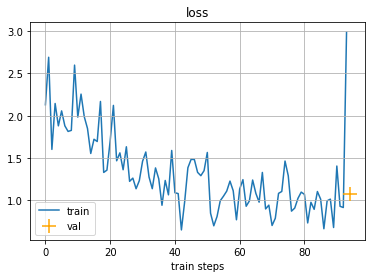

 10%|████████                                                                        | 1/10 [12:46<1:54:58, 766.54s/it]

Train loss: 1.319388824314318
Val loss: 1.0804892080016884
Train metric: 0.8484079356042055
Val metric: 0.8789699575741989
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [-21.925451278686523, 49.68099594116211, -5.2831854820251465, 152.88783645629883, 38.90019989013672, 15.130828857421875, 12.118474006652832, 6.969679832458496, 16.119726181030273, -3.8883891105651855, 6.37276029586792, 21.102453231811523, 18.952444076538086, 20.07313346862793, 20.512975692749023, 28.84205436706543]
true labels tensor([[ 6.6487e+03,  2.5952e+03,  5.8823e+03,  2.6264e+03, -3.7340e-01],
        [ 5.5870e+03,  5.0171e+03,  4.0868e+03,  3.2035e+03,  7.6245e-01],
        [ 8.2365e+03,  0.0000e+00,  8.6927e+03,  3.4124e+03, -9.2078e-02],
        [ 6.7994e+03,  4.2817e+03,  9.1445e+03,  4.3045e+03, -4.5573e-01],
        [ 6.6172e+03,  7.8285e+03,  4.6816e+03,  7.0657e+03,  6.2797e-01],
        [ 1.393

angles true tensor([336., 132., 140.,  88., 336., 270., 140., 256., 203., 116., 259.,  92.,
        304., 200., 313., 300.], dtype=torch.float64)
angles pred [6.6415114402771, -17.103965759277344, 45.03057861328125, 12.82676887512207, 3.3515586853027344, 6.09156608581543, 34.10506057739258, 20.216602325439453, 2.515235424041748, 11.957552909851074, 15.451504707336426, 14.40706729888916, 18.349611282348633, 5.167260646820068, 11.779610633850098, -5.052870750427246]
true labels tensor([[ 7.2783e+03,  6.3861e+03,  6.7569e+03,  6.2098e+03,  1.1566e-01],
        [ 7.7675e+03,  3.9721e+03,  9.2956e+03,  5.2998e+03, -2.9411e-01],
        [ 7.6927e+03,  8.2005e+03,  4.9290e+03,  6.5203e+03,  7.0748e-01],
        [ 8.0506e+03,  2.3183e+03,  8.8110e+03,  1.3156e+03,  2.2200e-01],
        [ 9.0604e+03,  1.4836e+03,  7.3231e+03,  2.3224e+03,  5.8462e-02],
        [ 8.5868e+03,  4.8451e+03,  8.5908e+03,  4.0821e+03,  1.0612e-01],
        [ 6.6811e+02,  1.5233e+03,  3.3433e+03,  9.1740e+02,  5.6071e

angles true tensor([ 56.,  57., 108., 148., 112., 222., 200., 244., 316., 176., 148.,  92.,
         24., 304., 260., 304.], dtype=torch.float64)
angles pred [-17.48906135559082, 9.224096298217773, 43.28786849975586, -2.087519407272339, 7.973884105682373, -0.08919107913970947, -10.810798645019531, -20.409589767456055, -1.3884892463684082, 12.700498580932617, -5.164554119110107, 25.784225463867188, -25.80093002319336, 13.791769981384277, 9.424348831176758, 1.86916184425354]
true labels tensor([[ 6.3715e+03,  4.5399e+03,  6.6826e+03,  5.7083e+03, -3.0052e-01],
        [ 4.6260e+03,  5.4425e+03,  3.6622e+03,  4.9658e+03,  1.6030e-01],
        [ 2.7596e+03,  6.2548e+03,  5.2736e+03,  6.9488e+03,  6.8566e-01],
        [ 1.3690e+04,  8.4429e+03,  1.3107e+04,  1.0854e+04, -3.6426e-02],
        [ 5.1207e+03,  6.9762e+03,  6.6815e+03,  7.8491e+03,  1.3872e-01],
        [ 3.5016e+03,  2.9570e+03,  4.5499e+03,  2.7691e+03, -1.5567e-03],
        [ 6.8657e+03,  6.1762e+03,  7.3850e+03,  7.5498e+03,

angles true tensor([ 29., 106., 236., 307., 118., 116.,  54.,  12., 120., 240., 168., 236.,
         85., 184.,  74., 339.], dtype=torch.float64)
angles pred [0.418556272983551, 16.69062614440918, -13.48869514465332, 16.444429397583008, 27.955585479736328, 38.20762634277344, 19.54607582092285, 20.93235969543457, -27.60590171813965, -14.370028495788574, 43.958457946777344, -27.217388153076172, 24.670944213867188, -32.637474060058594, 15.495440483093262, 11.40129566192627]
true labels tensor([[ 1.0793e+04,  9.9295e+02,  9.5366e+03,  6.0367e+02,  7.3051e-03],
        [ 6.4775e+03,  6.7803e+03,  7.2686e+03,  8.2956e+03,  2.8720e-01],
        [ 6.2578e+03,  4.0987e+03,  7.0850e+03,  5.9945e+03, -2.3325e-01],
        [ 8.3055e+03,  5.1845e+03,  8.7604e+03,  4.4523e+03,  2.8309e-01],
        [ 4.2569e+03,  9.5032e+03,  4.4530e+03,  7.7359e+03,  4.6879e-01],
        [ 9.3667e+03,  9.1282e+03,  8.0231e+03,  8.2026e+03,  6.1851e-01],
        [ 5.8708e+03,  3.9152e+03,  5.3680e+03,  4.7655e+03,  

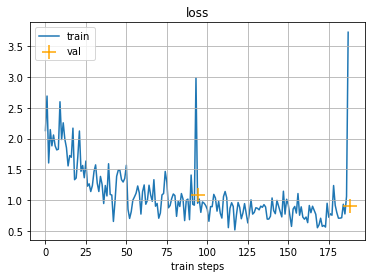

 20%|████████████████                                                                | 2/10 [27:03<1:49:18, 819.75s/it]

Train loss: 0.8451009954673698
Val loss: 0.8967795914196106
Train metric: 0.8976536704490726
Val metric: 0.9186891047421394
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [57.56953811645508, 67.14564514160156, 52.81794357299805, 43.850257873535156, 25.982969284057617, 56.703758239746094, 60.25490188598633, 38.95112228393555, 45.3858528137207, 29.05726432800293, 36.919036865234375, 23.73595428466797, 50.5214729309082, 21.16645050048828, 45.3760871887207, 63.62956237792969]
true labels tensor([[5.9220e+03, 5.1403e+03, 7.4599e+03, 6.2636e+03, 8.4404e-01],
        [7.0018e+03, 7.2653e+03, 5.3750e+03, 7.0955e+03, 9.2150e-01],
        [5.2998e+03, 3.6446e+03, 5.7786e+03, 4.9268e+03, 7.9672e-01],
        [7.2805e+03, 6.8052e+03, 9.2211e+03, 6.5440e+03, 6.9278e-01],
        [5.6874e+03, 9.5056e+03, 4.8569e+03, 8.8912e+03, 4.3810e-01],
        [1.3942e+03, 4.7715e+03, 3.9789e+03, 5.516

angles true tensor([336., 132., 140.,  88., 336., 270., 140., 256., 203., 116., 259.,  92.,
        304., 200., 313., 300.], dtype=torch.float64)
angles pred [-2.846566677093506, 64.59532165527344, 55.81608200073242, 246.25670623779297, 56.113243103027344, 42.17531204223633, 242.66000366210938, 229.41032028198242, 55.52850341796875, 60.679115295410156, 43.2054328918457, 34.56306457519531, 58.36845779418945, 53.45569610595703, -34.35649490356445, 35.15152359008789]
true labels tensor([[ 6.2146e+03,  7.9135e+03,  7.4013e+03,  7.7437e+03, -4.9662e-02],
        [ 9.5105e+03,  7.7116e+03,  8.7912e+03,  6.7657e+03,  9.0330e-01],
        [ 8.9914e+03,  9.2081e+03,  8.0652e+03,  8.4526e+03,  8.2724e-01],
        [ 1.0117e+04,  4.3816e+03,  9.7452e+03,  5.2507e+03,  9.1536e-01],
        [ 9.9696e+03,  2.7881e+03,  1.1100e+04,  5.2255e+03,  8.3014e-01],
        [ 8.4445e+03,  6.5805e+03,  8.7379e+03,  5.3901e+03,  6.7140e-01],
        [ 5.0197e+03,  3.5818e+03,  3.7377e+03,  2.6413e+03,  8.8830e

angles true tensor([ 56.,  57., 108., 148., 112., 222., 200., 244., 316., 176., 148.,  92.,
         24., 304., 260., 304.], dtype=torch.float64)
angles pred [55.053226470947266, 231.4942626953125, 42.0815544128418, 41.80327606201172, -0.525031328201294, 209.02030754089355, 42.0745735168457, 8.476964950561523, 51.539833068847656, 43.50383758544922, 54.267433166503906, 233.43557357788086, 34.254329681396484, 17.720603942871094, -21.39363670349121, -14.660384178161621]
true labels tensor([[ 8.4181e+03,  8.0193e+03,  8.1340e+03,  7.4408e+03,  8.1968e-01],
        [ 2.9609e+03,  5.7515e+03,  3.9375e+03,  5.7350e+03,  7.8255e-01],
        [ 2.7283e+03,  8.4281e+03,  3.7321e+03,  9.9822e+03,  6.7019e-01],
        [ 1.1828e+04,  9.7335e+03,  7.7951e+03,  9.5799e+03,  6.6658e-01],
        [ 6.1516e+03,  9.8558e+03,  7.8425e+03,  9.4680e+03, -9.1634e-03],
        [ 5.1138e+03,  5.6550e+03,  6.0486e+03,  5.6854e+03,  4.8512e-01],
        [ 8.3191e+03,  8.4110e+03,  6.1583e+03,  8.0638e+03,  6.70

angles true tensor([ 29., 106., 236., 307., 118., 116.,  54.,  12., 120., 240., 168., 236.,
         85., 184.,  74., 339.], dtype=torch.float64)
angles pred [47.26845169067383, 35.4286994934082, -21.355228424072266, 43.925315856933594, 62.722347259521484, 47.135826110839844, 35.76358413696289, 30.513792037963867, 51.398799896240234, 4.310486793518066, 25.850130081176758, 21.4403018951416, 42.42039489746094, 39.44961166381836, 241.75593185424805, 31.145700454711914]
true labels tensor([[ 9.5517e+03,  4.6859e+03,  9.0780e+03,  4.9739e+03,  7.3454e-01],
        [ 8.1101e+03,  8.9977e+03,  9.2483e+03,  8.9809e+03,  5.7969e-01],
        [ 5.8796e+03,  7.8763e+03,  7.3965e+03,  7.8067e+03, -3.6415e-01],
        [ 1.0384e+04,  7.7440e+03,  1.0367e+04,  6.5444e+03,  6.9372e-01],
        [ 5.9169e+03,  9.1744e+03,  4.5428e+03,  9.1825e+03,  8.8880e-01],
        [ 1.1132e+04,  1.1257e+04,  1.0207e+04,  9.3864e+03,  7.3297e-01],
        [ 5.6928e+03,  5.2064e+03,  7.1180e+03,  5.2956e+03,  5.844

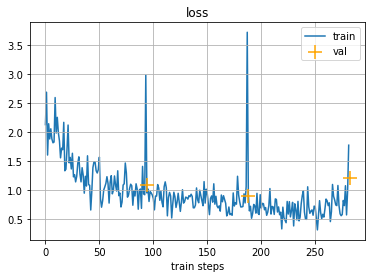

 30%|████████████████████████                                                        | 3/10 [41:02<1:36:39, 828.54s/it]

Train loss: 0.6876565912461664
Val loss: 1.2112744017896881
Train metric: 0.9097003390849986
Val metric: 0.9136958370830885
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [221.17754745483398, 67.258544921875, 22.057464599609375, 16.214567184448242, -23.110532760620117, 49.3036003112793, 42.61094665527344, 9.719054222106934, 28.099956512451172, 12.14026165008545, -3.4092066287994385, -11.17238998413086, -6.469069480895996, 212.26120376586914, 13.81771183013916, 61.30991744995117]
true labels tensor([[ 7.8067e+03,  5.6018e+03,  1.0285e+04,  5.5636e+03,  6.5839e-01],
        [ 6.7231e+03,  8.1087e+03,  6.9943e+03,  8.4483e+03,  9.2226e-01],
        [ 6.7478e+03,  1.7614e+03,  8.9666e+03,  5.0713e+03,  3.7554e-01],
        [ 8.1869e+03,  6.1742e+03,  1.0420e+04,  6.5289e+03,  2.7924e-01],
        [ 7.0708e+03,  6.4392e+03,  6.2952e+03,  7.5408e+03, -3.9251e-01],
        [ 1.9509e+

angles true tensor([336., 132., 140.,  88., 336., 270., 140., 256., 203., 116., 259.,  92.,
        304., 200., 313., 300.], dtype=torch.float64)
angles pred [-8.592416763305664, 40.470794677734375, 59.005306243896484, 55.92670822143555, 20.074508666992188, 6.14560079574585, 48.275726318359375, 16.8829402923584, 31.05414390563965, 60.44139099121094, -8.495534896850586, 48.77180862426758, 6.93487024307251, 25.47507667541504, -32.860721588134766, 10.581622123718262]
true labels tensor([[ 7.0043e+03,  7.8693e+03,  8.4916e+03,  8.7328e+03, -1.4940e-01],
        [ 9.1688e+03,  6.3653e+03,  1.0304e+04,  6.4546e+03,  6.4906e-01],
        [ 9.5120e+03,  7.7806e+03,  9.0358e+03,  8.6305e+03,  8.5721e-01],
        [ 8.0819e+03,  3.3869e+03,  1.1995e+04,  3.9133e+03,  8.2832e-01],
        [ 9.2069e+03,  2.0041e+03,  1.0219e+04,  5.3066e+03,  3.4324e-01],
        [ 8.2224e+03,  6.6839e+03,  1.0282e+04,  6.5711e+03,  1.0706e-01],
        [ 5.0545e+03,  4.5505e+03,  6.3368e+03,  4.1934e+03,  7.4636e

angles true tensor([ 56.,  57., 108., 148., 112., 222., 200., 244., 316., 176., 148.,  92.,
         24., 304., 260., 304.], dtype=torch.float64)
angles pred [54.09415817260742, 222.5074920654297, 33.671295166015625, 49.04370880126953, 35.00896072387695, 16.840782165527344, -8.023946762084961, -29.116470336914062, 22.07050132751465, 5.059909820556641, -16.5452823638916, 35.71063995361328, -17.233745574951172, 43.555233001708984, -29.79895782470703, -21.691490173339844]
true labels tensor([[ 9.8214e+03,  7.0642e+03,  1.1773e+04,  6.8992e+03,  8.0998e-01],
        [ 3.8750e+03,  4.3125e+03,  4.6757e+03,  5.5957e+03,  6.7569e-01],
        [ 1.4688e+03,  7.5550e+03,  2.6155e+03,  9.1982e+03,  5.5443e-01],
        [ 1.0428e+04,  8.0719e+03,  9.7463e+03,  8.1095e+03,  7.5521e-01],
        [ 6.7529e+03,  8.5128e+03,  8.4463e+03,  9.1141e+03,  5.7370e-01],
        [ 5.1918e+03,  4.5843e+03,  6.6777e+03,  5.1882e+03,  2.8971e-01],
        [ 6.0535e+03,  6.5958e+03,  6.5109e+03,  7.6714e+03, -1.

angles true tensor([ 29., 106., 236., 307., 118., 116.,  54.,  12., 120., 240., 168., 236.,
         85., 184.,  74., 339.], dtype=torch.float64)
angles pred [38.913063049316406, 53.29594421386719, 141.58867645263672, 28.739198684692383, 42.0443115234375, 62.262542724609375, 13.115642547607422, 6.070813179016113, 23.82763671875, -36.07449722290039, 26.419960021972656, 27.147539138793945, 53.323978424072266, 31.98166275024414, 62.382659912109375, -7.2271552085876465]
true labels tensor([[ 1.0852e+04,  2.0690e+03,  1.0936e+04,  2.4090e+03,  6.2814e-01],
        [ 9.9566e+03,  7.6157e+03,  1.0554e+04,  7.8701e+03,  8.0173e-01],
        [ 4.2982e+03,  7.1268e+03,  5.5134e+03,  5.7883e+03, -6.2130e-01],
        [ 9.4554e+03,  7.2908e+03,  1.0420e+04,  7.6640e+03,  4.8082e-01],
        [ 3.2102e+03,  8.7398e+03,  4.9625e+03,  9.9720e+03,  6.6971e-01],
        [ 9.8801e+03,  9.2754e+03,  1.0547e+04,  8.3588e+03,  8.8509e-01],
        [ 7.4943e+03,  5.1508e+03,  8.9929e+03,  5.4720e+03,  2.269

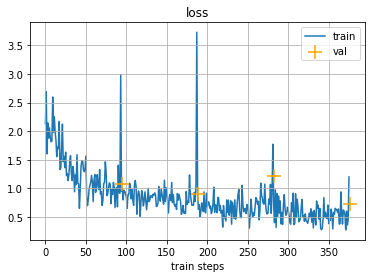

 40%|████████████████████████████████                                                | 4/10 [54:48<1:22:45, 827.67s/it]

Train loss: 0.5583190652161557
Val loss: 0.7364407316388855
Train metric: 0.9158361883764734
Val metric: 0.9199180869820746
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [32.06463623046875, 253.83802795410156, -51.95790100097656, -41.27328109741211, 7.060445308685303, 28.75756072998047, -7.907621383666992, 140.72739028930664, -13.828840255737305, -37.96485137939453, -4.471467971801758, 2.9512741565704346, -1.966356635093689, 2.01540470123291, 3.5200934410095215, 67.44784545898438]
true labels tensor([[ 6.4360e+03,  5.3406e+03,  8.0182e+03,  6.7465e+03,  5.3088e-01],
        [ 5.9251e+03,  8.1108e+03,  5.7563e+03,  9.7894e+03,  9.6048e-01],
        [ 6.0204e+03,  2.9116e+03,  5.4058e+03,  3.7421e+03, -7.8756e-01],
        [ 6.9316e+03,  5.2313e+03,  7.6697e+03,  6.4503e+03, -6.5965e-01],
        [ 4.6878e+03,  7.7928e+03,  4.4172e+03,  9.0860e+03,  1.2292e-01],
        [ 7.245

angles true tensor([336., 132., 140.,  88., 336., 270., 140., 256., 203., 116., 259.,  92.,
        304., 200., 313., 300.], dtype=torch.float64)
angles pred [-28.494857788085938, 34.427799224853516, 71.9504623413086, 259.6786117553711, -5.619059085845947, -43.565792083740234, 221.32713317871094, -30.582866668701172, -4.385569095611572, 42.90201950073242, 142.71897506713867, 43.911136627197266, -29.871570587158203, 151.3392333984375, -62.02911376953125, -53.4888916015625]
true labels tensor([[ 6.1619e+03,  8.5040e+03,  7.6232e+03,  8.1747e+03, -4.7708e-01],
        [ 7.0537e+03,  7.4342e+03,  9.2682e+03,  5.8899e+03,  5.6537e-01],
        [ 6.0010e+03,  8.5038e+03,  6.1577e+03,  1.0285e+04,  9.5079e-01],
        [ 6.3129e+03,  4.2141e+03,  1.0175e+04,  4.5261e+03,  9.8382e-01],
        [ 8.2026e+03,  1.0932e+03,  9.1384e+03,  2.0078e+03, -9.7914e-02],
        [ 6.8203e+03,  5.1974e+03,  8.1656e+03,  2.9858e+03, -6.8919e-01],
        [ 3.0236e+03,  4.6450e+03,  4.8316e+03,  5.2284e+03, 

angles true tensor([ 56.,  57., 108., 148., 112., 222., 200., 244., 316., 176., 148.,  92.,
         24., 304., 260., 304.], dtype=torch.float64)
angles pred [34.8371696472168, 17.421260833740234, 37.150428771972656, 14.885648727416992, -1.1029375791549683, -48.8721809387207, -28.3404483795166, 122.27069091796875, -42.59970474243164, -18.796619415283203, 159.44257736206055, 76.8812484741211, 136.60157775878906, 15.146122932434082, -52.16203308105469, -50.98223114013672]
true labels tensor([[ 8.5424e+03,  8.1512e+03,  9.1150e+03,  7.5563e+03,  5.7125e-01],
        [ 3.3283e+03,  6.7602e+03,  4.4154e+03,  7.9809e+03,  2.9939e-01],
        [ 1.3197e+03,  8.7051e+03,  2.0081e+03,  9.0013e+03,  6.0391e-01],
        [ 8.5397e+03,  9.1570e+03,  8.9207e+03,  1.0248e+04,  2.5689e-01],
        [ 6.7628e+03,  9.1168e+03,  8.7533e+03,  1.0281e+04, -1.9249e-02],
        [ 4.4853e+03,  4.9635e+03,  5.0765e+03,  4.1424e+03, -7.5324e-01],
        [ 4.8606e+03,  6.1063e+03,  5.4232e+03,  7.3050e+03, -4

angles true tensor([ 29., 106., 236., 307., 118., 116.,  54.,  12., 120., 240., 168., 236.,
         85., 184.,  74., 339.], dtype=torch.float64)
angles pred [41.3734130859375, 33.875980377197266, 104.93502044677734, 8.611681938171387, 61.024593353271484, 77.6489028930664, 147.28781509399414, -23.64699935913086, 14.68732738494873, -74.282470703125, -0.2699275314807892, -2.730318546295166, 247.9891357421875, -49.238948822021484, 59.23694610595703, -32.92354202270508]
true labels tensor([[ 9.9097e+03,  1.6472e+03,  8.3045e+03,  3.2091e+03,  6.6096e-01],
        [ 7.6880e+03,  7.5993e+03,  9.2022e+03,  8.2834e+03,  5.5740e-01],
        [ 3.9422e+03,  6.8306e+03,  4.9153e+03,  7.2541e+03, -9.6622e-01],
        [ 6.8193e+03,  6.3782e+03,  8.1929e+03,  5.6052e+03,  1.4974e-01],
        [ 1.8290e+03,  8.2268e+03,  2.2534e+03,  1.0104e+04,  8.7483e-01],
        [ 7.4270e+03,  9.6182e+03,  1.0091e+04,  1.1450e+04,  9.7686e-01],
        [ 5.5093e+03,  2.5249e+03,  7.0699e+03,  2.9528e+03, -5.404

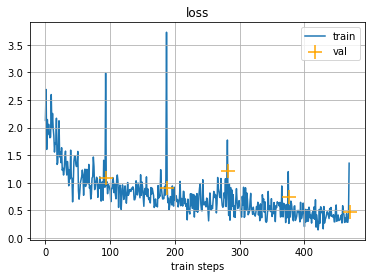

 50%|███████████████████████████████████████                                       | 5/10 [1:08:46<1:09:16, 831.30s/it]

Train loss: 0.4112450190267489
Val loss: 0.4754375789808221
Train metric: 0.9224746387735904
Val metric: 0.9340214516602998
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [-10.3114595413208, 74.78585815429688, 11.4463472366333, -62.17503356933594, -15.918540000915527, 66.20758819580078, 23.077672958374023, 1.3912382125854492, -17.15243148803711, -7.9581451416015625, 7.952308654785156, 5.51388692855835, 6.6353373527526855, 5.643232345581055, 28.167821884155273, 235.46244049072266]
true labels tensor([[ 7.7833e+03,  5.2848e+03,  8.6743e+03,  5.3540e+03, -1.7900e-01],
        [ 6.5834e+03,  8.0583e+03,  6.1363e+03,  6.9396e+03,  9.6495e-01],
        [ 6.4657e+03,  3.3909e+03,  6.9427e+03,  4.3847e+03,  1.9845e-01],
        [ 7.5164e+03,  5.6066e+03,  7.9443e+03,  6.9769e+03, -8.8438e-01],
        [ 6.0754e+03,  8.4407e+03,  5.5255e+03,  7.0333e+03, -2.7427e-01],
        [ 2.1855e

angles true tensor([336., 132., 140.,  88., 336., 270., 140., 256., 203., 116., 259.,  92.,
        304., 200., 313., 300.], dtype=torch.float64)
angles pred [-4.352778434753418, -4.323914527893066, 52.25493621826172, 262.90869903564453, 17.885793685913086, -46.8446159362793, 48.65462875366211, 153.19508361816406, 3.745467185974121, 248.90896606445312, -19.44985008239746, 66.32986450195312, -6.89215612411499, 32.0821533203125, -52.76446533203125, -48.76820373535156]
true labels tensor([[ 5.4478e+03,  7.1278e+03,  6.4335e+03,  7.0113e+03, -7.5897e-02],
        [ 7.3124e+03,  7.5782e+03,  8.6929e+03,  7.2244e+03, -7.5395e-02],
        [ 7.9199e+03,  8.6032e+03,  7.6070e+03,  8.3283e+03,  7.9074e-01],
        [ 8.5530e+03,  3.2407e+03,  1.0075e+04,  4.5650e+03,  9.9235e-01],
        [ 8.9054e+03,  1.2850e+03,  9.3715e+03,  3.3752e+03,  3.0712e-01],
        [ 7.2148e+03,  6.4915e+03,  8.2046e+03,  6.0515e+03, -7.2950e-01],
        [ 5.4207e+03,  3.1009e+03,  3.7649e+03,  3.6397e+03,  7.507

angles true tensor([ 56.,  57., 108., 148., 112., 222., 200., 244., 316., 176., 148.,  92.,
         24., 304., 260., 304.], dtype=torch.float64)
angles pred [24.344581604003906, 45.23035430908203, 38.4625129699707, 6.375850677490234, 8.844632148742676, 147.17788696289062, -20.965591430664062, -69.73416900634766, -33.580101013183594, 0.3032008707523346, 9.422985076904297, 254.80279541015625, 16.16122055053711, 216.20240783691406, -54.366600036621094, -61.63245391845703]
true labels tensor([[ 7.2550e+03,  8.3555e+03,  8.8052e+03,  7.4574e+03,  4.1222e-01],
        [ 3.1880e+03,  5.9298e+03,  3.1423e+03,  6.4101e+03,  7.0994e-01],
        [ 1.8326e+03,  7.6873e+03,  1.4258e+03,  7.2454e+03,  6.2200e-01],
        [ 9.6021e+03,  8.7615e+03,  9.0293e+03,  9.6505e+03,  1.1105e-01],
        [ 7.6100e+03,  8.8338e+03,  7.6154e+03,  9.2296e+03,  1.5376e-01],
        [ 4.1429e+03,  5.0546e+03,  4.3939e+03,  4.9083e+03, -5.4203e-01],
        [ 6.3525e+03,  6.6627e+03,  6.6534e+03,  7.7864e+03, -3

angles true tensor([ 29., 106., 236., 307., 118., 116.,  54.,  12., 120., 240., 168., 236.,
         85., 184.,  74., 339.], dtype=torch.float64)
angles pred [70.64947509765625, 216.76637649536133, -69.71699523925781, -15.179780960083008, 60.477481842041016, 250.68316650390625, 17.816904067993164, -25.92454719543457, 2.258727550506592, -78.38683319091797, 6.510628700256348, 122.80318450927734, 71.48439025878906, -53.043296813964844, 64.50413513183594, -37.731903076171875]
true labels tensor([[ 9.1615e+03,  2.6691e+03,  1.0082e+04,  3.8150e+03,  9.4351e-01],
        [ 9.1305e+03,  8.5811e+03,  9.5640e+03,  8.7388e+03,  5.9855e-01],
        [ 3.3595e+03,  7.7215e+03,  3.3129e+03,  7.0851e+03, -9.3799e-01],
        [ 7.9555e+03,  6.2023e+03,  8.2966e+03,  5.2002e+03, -2.6185e-01],
        [ 4.7879e+03,  8.1244e+03,  4.7237e+03,  8.4862e+03,  8.7016e-01],
        [ 7.9880e+03,  9.9171e+03,  8.8921e+03,  9.2138e+03,  9.4370e-01],
        [ 6.7508e+03,  5.3282e+03,  6.1676e+03,  4.4542e+03, 

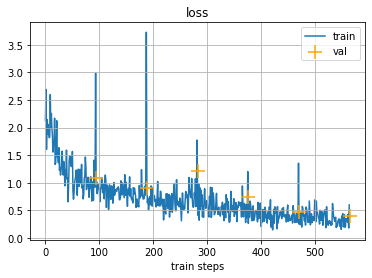

Train loss: 0.3564312797254188
Val loss: 0.3885221375848155


 60%|████████████████████████████████████████████████                                | 6/10 [1:23:46<56:58, 854.68s/it]

Train metric: 0.9256231385144235
Val metric: 0.9440586086724949
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [230.0615692138672, 79.88994598388672, 144.82655334472656, -29.234033584594727, -26.895633697509766, 244.8812484741211, 9.638997077941895, -27.903564453125, -41.2959098815918, 2.929046392440796, 27.451732635498047, 0.6830892562866211, 29.785045623779297, -30.086137771606445, 28.427410125732422, 46.86128616333008]
true labels tensor([[ 7.6125e+03,  5.1915e+03,  7.8600e+03,  5.0330e+03,  7.6673e-01],
        [ 7.9668e+03,  6.4845e+03,  6.3135e+03,  6.2806e+03,  9.8447e-01],
        [ 6.3641e+03,  2.1547e+03,  6.8603e+03,  2.2702e+03, -5.7605e-01],
        [ 8.1846e+03,  6.0042e+03,  9.3899e+03,  4.8646e+03, -4.8838e-01],
        [ 4.2810e+03,  8.5737e+03,  4.0736e+03,  6.7694e+03, -4.5237e-01],
        [ 8.7180e+02,  3.8792e+03,  1.9586e+03,  4.5539e+03,  9.0543e-01],
 

angles true tensor([336., 132., 140.,  88., 336., 270., 140., 256., 203., 116., 259.,  92.,
        304., 200., 313., 300.], dtype=torch.float64)
angles pred [-24.197755813598633, 26.723352432250977, 38.4805793762207, 82.44869232177734, 14.787297248840332, -8.385141372680664, 55.374595642089844, -30.875913619995117, 1.471144676208496, 253.68196868896484, 46.574745178222656, 57.3297004699707, -28.049741744995117, -4.582319259643555, -34.62350845336914, 135.49403762817383]
true labels tensor([[ 6.2656e+03,  7.8876e+03,  7.6921e+03,  7.5535e+03, -4.0989e-01],
        [ 7.2342e+03,  7.0300e+03,  7.7661e+03,  6.1683e+03,  4.4968e-01],
        [ 7.8193e+03,  8.1781e+03,  7.1096e+03,  7.9934e+03,  6.2225e-01],
        [ 9.9921e+03,  1.5015e+03,  1.2563e+04,  1.9246e+02,  9.9133e-01],
        [ 1.0144e+04,  6.3823e+02,  8.9321e+03,  1.6581e+03,  2.5523e-01],
        [ 7.4166e+03,  4.5028e+03,  8.3923e+03,  3.0804e+03, -1.4583e-01],
        [ 3.8772e+03,  3.4128e+03,  4.9426e+03,  3.0372e+03,  

angles true tensor([ 56.,  57., 108., 148., 112., 222., 200., 244., 316., 176., 148.,  92.,
         24., 304., 260., 304.], dtype=torch.float64)
angles pred [217.8321990966797, 42.406639099121094, 56.00398635864258, 24.00581932067871, 16.565290451049805, -36.8816032409668, -20.32898712158203, 116.02004623413086, -25.996828079223633, -3.074831485748291, 2.097414255142212, 77.67247772216797, 11.1644868850708, 2.472886085510254, -67.61882019042969, -45.05033874511719]
true labels tensor([[ 7.0279e+03,  7.8024e+03,  7.8026e+03,  6.8064e+03,  6.1335e-01],
        [ 3.7294e+03,  6.2824e+03,  4.1004e+03,  6.1939e+03,  6.7439e-01],
        [ 2.0252e+03,  7.0471e+03,  2.7772e+03,  6.7936e+03,  8.2908e-01],
        [ 1.0406e+04,  8.8241e+03,  8.8415e+03,  8.4841e+03,  4.0683e-01],
        [ 7.4455e+03,  9.1361e+03,  8.6254e+03,  8.8645e+03,  2.8511e-01],
        [ 3.7711e+03,  5.6913e+03,  4.8716e+03,  4.9019e+03, -6.0016e-01],
        [ 6.4098e+03,  7.0891e+03,  6.3294e+03,  7.2143e+03, -3.474

angles true tensor([ 29., 106., 236., 307., 118., 116.,  54.,  12., 120., 240., 168., 236.,
         85., 184.,  74., 339.], dtype=torch.float64)
angles pred [73.0958251953125, 63.35732650756836, -68.20014953613281, 223.7553939819336, 42.8293571472168, 69.89604187011719, 61.501861572265625, -16.44989013671875, 33.39216232299805, -76.15064239501953, -13.149224281311035, -59.981285095214844, 62.90135192871094, -32.11538314819336, 60.204986572265625, -17.5650577545166]
true labels tensor([[ 1.0163e+04,  1.2115e+03,  9.4686e+03,  1.2816e+03,  9.5679e-01],
        [ 9.4313e+03,  8.5211e+03,  1.0484e+04,  7.6704e+03,  8.9382e-01],
        [ 1.7629e+03,  8.2237e+03,  3.2951e+03,  6.8274e+03, -9.2849e-01],
        [ 1.0357e+04,  5.1227e+03,  9.2489e+03,  4.5611e+03,  6.9158e-01],
        [ 3.8208e+03,  7.8040e+03,  4.7129e+03,  8.6401e+03,  6.7982e-01],
        [ 8.4740e+03,  8.6365e+03,  9.3508e+03,  7.7479e+03,  9.3907e-01],
        [ 7.7882e+03,  3.2957e+03,  6.4259e+03,  2.7983e+03,  8.788

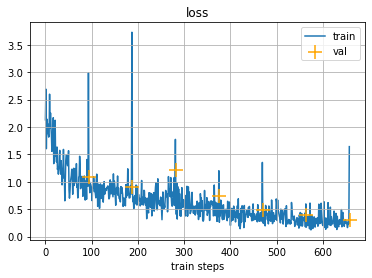

 70%|████████████████████████████████████████████████████████                        | 7/10 [1:38:32<43:14, 864.77s/it]

Train loss: 0.29075779831174065
Val loss: 0.2984118401016816
Train metric: 0.9291601843093921
Val metric: 0.9464705716922569


 70%|████████████████████████████████████████████████████████                        | 7/10 [1:40:16<42:58, 859.56s/it]


KeyboardInterrupt: 

In [37]:
train_loss_log, train_acc_log, val_loss_log, val_acc_log = train(model, 
                                                                 criterion, 
                                                                 optimizer, 
                                                                 train_loader, 
                                                                 valid_loader, 
                                                                 10)

In [38]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2103541605.py:29: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)
C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2103541605.py:76: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='tr

angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [38.44062423706055, 259.7335739135742, -40.463253021240234, -25.330432891845703, -30.3316593170166, 64.14534759521484, 4.567593097686768, -22.93537139892578, -43.90034103393555, 2.164188861846924, -10.788492202758789, -3.366391897201538, -17.360294342041016, -16.845937728881836, 20.054588317871094, 49.697425842285156]
true labels tensor([[ 7.7477e+03,  4.6037e+03,  7.9536e+03,  4.1622e+03,  6.2170e-01],
        [ 6.6503e+03,  6.0936e+03,  5.8210e+03,  6.7347e+03,  9.8399e-01],
        [ 6.2933e+03,  2.3099e+03,  6.7614e+03,  2.9396e+03, -6.4896e-01],
        [ 7.9690e+03,  5.1140e+03,  9.4078e+03,  4.4865e+03, -4.2784e-01],
        [ 4.1921e+03,  7.8196e+03,  4.3473e+03,  6.2182e+03, -5.0500e-01],
        [ 7.8378e+02,  3.2029e+03,  1.5082e+03,  4.2973e+03,  8.9990e-01],
        [ 4.8920e+03,  4.2827e+03,  5.8457e+03,  4.2320e+03,

angles true tensor([336., 132., 140.,  88., 336., 270., 140., 256., 203., 116., 259.,  92.,
        304., 200., 313., 300.], dtype=torch.float64)
angles pred [-29.74557113647461, 16.15749168395996, 39.87449264526367, 78.59757995605469, 7.580900192260742, -46.20341110229492, 37.712562561035156, -35.14439010620117, 0.10336150974035263, 73.05570983886719, -21.57411003112793, 55.64162826538086, -29.909950256347656, 5.339783191680908, -41.6963005065918, 134.6131134033203]
true labels tensor([[ 5.3943e+03,  7.2139e+03,  6.6934e+03,  6.8883e+03, -4.9615e-01],
        [ 7.0144e+03,  6.2041e+03,  7.7142e+03,  5.6623e+03,  2.7828e-01],
        [ 6.9538e+03,  7.5941e+03,  6.6806e+03,  7.8101e+03,  6.4111e-01],
        [ 9.0081e+03,  4.0248e+02,  1.0957e+04,  7.3655e+02,  9.8026e-01],
        [ 9.7316e+03,  9.7980e+02,  9.7057e+03,  1.3944e+03,  1.3193e-01],
        [ 6.5807e+03,  6.4727e+03,  7.5143e+03,  4.3240e+03, -7.2180e-01],
        [ 3.4099e+03,  2.1349e+03,  4.5619e+03,  3.5294e+03,  6.11

angles true tensor([ 56.,  57., 108., 148., 112., 222., 200., 244., 316., 176., 148.,  92.,
         24., 304., 260., 304.], dtype=torch.float64)
angles pred [38.06321716308594, 26.338769912719727, 50.119747161865234, 28.763647079467773, 34.42940902709961, -38.20051574707031, -16.281389236450195, -63.24692916870117, -30.9542179107666, -0.6260952949523926, -1.4423631429672241, 78.53912353515625, -3.918691635131836, 9.677490234375, -72.07575988769531, -57.354103088378906]
true labels tensor([[ 6.4711e+03,  6.7933e+03,  7.0740e+03,  6.6896e+03,  6.1653e-01],
        [ 3.6671e+03,  5.7037e+03,  4.1538e+03,  5.9887e+03,  4.4368e-01],
        [ 1.6183e+03,  6.4924e+03,  1.6253e+03,  7.3070e+03,  7.6739e-01],
        [ 1.0403e+04,  8.9505e+03,  8.9336e+03,  8.3480e+03,  4.8120e-01],
        [ 7.1915e+03,  8.8359e+03,  7.7210e+03,  8.5757e+03,  5.6539e-01],
        [ 3.3232e+03,  5.9492e+03,  4.0051e+03,  5.1296e+03, -6.1842e-01],
        [ 6.0614e+03,  6.4244e+03,  6.0301e+03,  6.7089e+03, -2

angles true tensor([ 29., 106., 236., 307., 118., 116.,  54.,  12., 120., 240., 168., 236.,
         85., 184.,  74., 339.], dtype=torch.float64)
angles pred [247.94857025146484, 67.76322937011719, -61.37287521362305, 28.178312301635742, 39.53050994873047, 75.15101623535156, 25.500797271728516, -24.932275772094727, 51.76655197143555, -68.40513610839844, -20.592731475830078, 120.21804428100586, 252.9780502319336, -29.34539794921875, 59.009525299072266, -24.59905433654785]
true labels tensor([[ 8.7912e+03,  3.8985e+02,  9.5809e+03,  1.6730e+03,  9.2685e-01],
        [ 8.3447e+03,  8.0735e+03,  9.7860e+03,  7.2701e+03,  9.2563e-01],
        [ 1.9495e+03,  8.2321e+03,  3.0233e+03,  6.4048e+03, -8.7776e-01],
        [ 8.7149e+03,  5.4236e+03,  8.7119e+03,  5.3159e+03,  4.7222e-01],
        [ 3.2382e+03,  6.7122e+03,  3.9646e+03,  7.4968e+03,  6.3649e-01],
        [ 7.7127e+03,  8.1204e+03,  8.3807e+03,  8.2823e+03,  9.6660e-01],
        [ 6.2789e+03,  4.1979e+03,  5.8206e+03,  3.8734e+03,  

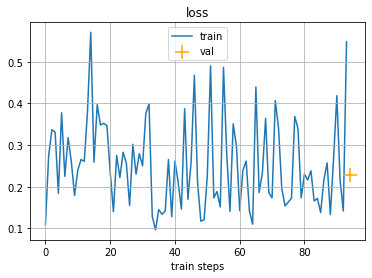

 20%|████████████████▏                                                                | 1/5 [15:52<1:03:29, 952.33s/it]

Train loss: 0.2505001819591565
Val loss: 0.22722632646650434
Train metric: 0.9416099962604483
Val metric: 0.9510956267906995
angles true tensor([140.,  96., 248., 201., 272.,  80., 168., 216., 326.,   1., 247., 316.,
        249., 284.,  91.,  35.], dtype=torch.float64)
angles pred [36.10544204711914, 75.93560028076172, -49.49571990966797, -23.23849868774414, -37.79054641723633, 59.8594856262207, 7.771907329559326, -19.902891159057617, 134.19672012329102, 9.464643478393555, -2.293801784515381, -7.922395706176758, 1.9284920692443848, -28.340824127197266, 18.784873962402344, 228.86252212524414]
true labels tensor([[ 8.2480e+03,  5.2192e+03,  8.0615e+03,  4.4974e+03,  5.8927e-01],
        [ 6.4361e+03,  6.9549e+03,  5.1740e+03,  6.5017e+03,  9.7002e-01],
        [ 6.1127e+03,  1.9429e+03,  7.1527e+03,  2.1111e+03, -7.6036e-01],
        [ 7.7996e+03,  5.0693e+03,  9.2866e+03,  4.5550e+03, -3.9456e-01],
        [ 3.5854e+03,  8.4252e+03,  3.8754e+03,  6.9423e+03, -6.1278e-01],
        [ 5.0

angles true tensor([336., 132., 140.,  88., 336., 270., 140., 256., 203., 116., 259.,  92.,
        304., 200., 313., 300.], dtype=torch.float64)
angles pred [-29.324512481689453, 19.59132194519043, 33.86691665649414, 79.13082885742188, 11.96322250366211, -42.05575942993164, 33.000770568847656, -28.2780704498291, 5.121284008026123, 69.56788635253906, -9.560688018798828, 232.74637603759766, -28.233633041381836, 8.059138298034668, -43.355072021484375, -54.8586540222168]
true labels tensor([[ 5.7604e+03,  7.5011e+03,  6.9935e+03,  7.2630e+03, -4.8976e-01],
        [ 7.1732e+03,  6.3980e+03,  7.7449e+03,  5.6174e+03,  3.3531e-01],
        [ 7.0743e+03,  8.0752e+03,  6.5334e+03,  7.9830e+03,  5.5727e-01],
        [ 9.1413e+03,  2.9176e+02,  1.0412e+04,  0.0000e+00,  9.8206e-01],
        [ 9.6445e+03,  1.3168e+03,  9.1760e+03,  1.7598e+03,  2.0728e-01],
        [ 6.6816e+03,  6.0665e+03,  6.7773e+03,  4.8283e+03, -6.6985e-01],
        [ 3.8304e+03,  2.2399e+03,  4.1655e+03,  3.6480e+03,  5.4

angles true tensor([ 56.,  57., 108., 148., 112., 222., 200., 244., 316., 176., 148.,  92.,
         24., 304., 260., 304.], dtype=torch.float64)
angles pred [26.83412742614746, 20.135282516479492, 45.52252197265625, 22.565616607666016, 31.606918334960938, -41.64838409423828, -14.373929977416992, 116.54414749145508, 139.41255569458008, -2.968502998352051, -0.5990132689476013, 74.97946166992188, -0.9927287101745605, 0.7409442067146301, -74.47130584716797, -61.2415657043457]
true labels tensor([[ 6.3247e+03,  7.4820e+03,  7.3931e+03,  6.9837e+03,  4.5141e-01],
        [ 2.8958e+03,  6.0182e+03,  3.6962e+03,  6.0988e+03,  3.4424e-01],
        [ 1.3915e+03,  7.3112e+03,  1.2632e+03,  7.5898e+03,  7.1353e-01],
        [ 1.0640e+04,  9.5628e+03,  8.7855e+03,  8.1356e+03,  3.8374e-01],
        [ 7.3245e+03,  8.9813e+03,  8.4664e+03,  8.7727e+03,  5.2409e-01],
        [ 3.5477e+03,  6.1740e+03,  4.1367e+03,  5.5823e+03, -6.6456e-01],
        [ 6.4781e+03,  6.8654e+03,  6.2045e+03,  7.0767e+03,

angles true tensor([ 29., 106., 236., 307., 118., 116.,  54.,  12., 120., 240., 168., 236.,
         85., 184.,  74., 339.], dtype=torch.float64)
angles pred [68.37395477294922, 61.60247802734375, -67.69756317138672, 16.700952529907227, 33.04522705078125, 70.65927124023438, 204.1368179321289, -23.449281692504883, 47.52937316894531, -69.7744369506836, -21.273645401000977, -63.1459846496582, 71.77367401123047, -22.43390655517578, 54.19094467163086, -22.960355758666992]
true labels tensor([[ 8.6815e+03,  4.5017e+02,  8.7182e+03,  1.3235e+03,  9.2961e-01],
        [ 8.7610e+03,  8.5169e+03,  1.0127e+04,  7.3086e+03,  8.7967e-01],
        [ 1.8184e+03,  8.5929e+03,  3.2784e+03,  6.8960e+03, -9.2519e-01],
        [ 8.3183e+03,  5.2905e+03,  8.7598e+03,  5.2814e+03,  2.8738e-01],
        [ 3.3154e+03,  7.1133e+03,  3.8624e+03,  8.0289e+03,  5.4530e-01],
        [ 7.7955e+03,  8.6857e+03,  8.6364e+03,  8.1202e+03,  9.4357e-01],
        [ 6.1932e+03,  4.4744e+03,  5.7826e+03,  3.6773e+03,  4.08

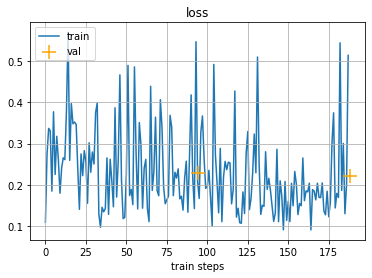

 40%|█████████████████████████████████▏                                                 | 2/5 [30:08<44:47, 895.86s/it]

Train loss: 0.20482118934682178
Val loss: 0.22146275872925678
Train metric: 0.9416781837716721
Val metric: 0.9528043098460917


 40%|████████████████████████████████▊                                                 | 2/5 [34:56<52:24, 1048.29s/it]


KeyboardInterrupt: 

In [39]:
train_loss_log, train_acc_log, val_loss_log, val_acc_log = train(model, 
                                                                 criterion, 
                                                                 optimizer, 
                                                                 train_loader, 
                                                                 valid_loader, 
                                                                 5)

In [40]:
torch.save(model.state_dict(), 'models/resnext_trig_ext_relu.pt')

In [41]:
class TestImageDatasetTrig(Dataset):
    def __init__(self, files, transform=None, device='cuda:0', scale=2):
        self.files = files
        self.scale = scale
        self.device = device
        self.transform = transform
    def __getitem__(self, idx):
        image_name = self.files[idx]
        image = cv2.imread(image_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (image.shape[0]//self.scale, image.shape[1]//self.scale), cv2.INTER_CUBIC)
        orig_img = image
        image = Image.fromarray(image)
        if self.transform:
            image = self.transform(image)
        return orig_img, image.float().to(self.device)
    def __len__(self):
        return len(self.files)

In [42]:
test_files = sorted(glob('data\\test\\img_uncloud\\*'))

In [43]:
test_dataset = TestImageDatasetTrig(test_files, valid_transform, device, scale)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=16,
                                           # shuffle=True,
                                           #pin_memory=True,
                                           num_workers=0)

In [44]:
indexes = [x.split('\\')[-1].split('.')[0] for x in test_files]
preds = []

for orig_img, imgs in test_loader:
    imgs = imgs.cuda(device)         
    y_pred = model(imgs)
    y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)
    y_pred[:, :4] = y_pred[:, :4] * 10496
    #y_pred[:, -1] = y_pred[:, -1] #* 360 + 180
    angles = torch.asin(y_pred[:, -1])/np.pi*180

    real_angles = []
    for i, angle in enumerate(angles):
        cx = np.clip(int((y_pred_1[i, 0]+y_pred_1[i, 2])/2), 1024//scale+1, 10496//scale - 1024//scale)
        cy = np.clip(int((y_pred_1[i, 1]+y_pred_1[i, 3])/2), 1024//scale+1, 10496//scale - 1024//scale)
        real_ang = real_angle(float(angle), cx, cy, orig_img, scale)
        real_angles.append(real_ang)
    clipped_pred = y_pred.cpu().detach()
    for i, pred in enumerate(y_pred.cpu().detach()):
        clipped_pred[i, :4] = torch.clip(pred[:4], 1, 10496)
        cx = (clipped_pred[i, 0]+clipped_pred[i, 2])/2
        cy = (clipped_pred[i, 1]+clipped_pred[i, 3])/2
        if cx < 512:
            clipped_pred[i,0] += 512 - cx 
            clipped_pred[i, 2] += 512 - cx 
        if cy < 512:
            clipped_pred[i, 1] += 512 - cy 
            clipped_pred[i, 3] += 512 - cy
        if cx > 10496-512-1:
            clipped_pred[i, 0] -= cx - (10496-512-1)
            clipped_pred[i, 2] -= cx - (10496-512-1)
        if cy > 10496-512-1:
            clipped_pred[i, 1] -= cy - (10496-512-1) 
            clipped_pred[i, 3] -= cy - (10496-512-1)
        clipped_pred[i, 4] = real_angles[i]
    torch.cuda.empty_cache()
    del y_pred_1
    
    preds.extend(list(clipped_pred))
    print(preds[-1])
    del clipped_pred

C:\Users\uhin\AppData\Local\Temp\2\ipykernel_35176\2983123453.py:7: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  y_pred_1 =  torch.clip(y_pred[:, :4] * 10496//scale, 1, 10496//scale)


tensor([2416.6492, 3662.1182, 3769.5569, 3952.8584,   -9.5177])
tensor([6807.1426, 7867.9146, 7952.6611, 7465.0645,  -21.7274])
tensor([ 5.2200e+03,  6.1053e+03,  6.5863e+03,  6.8578e+03, -3.2385e-01])
tensor([1265.5350, 1981.1957, 3434.6589, 2952.8616,   18.9584])
tensor([1954.6184, 7287.9072, 3415.2932, 7974.8301,   21.9753])
tensor([3171.6943, 6246.4756, 4496.5454, 6302.5400,   21.5350])
tensor([7585.1606, 1749.3417, 6923.7793,  695.9999,  -39.1483])
tensor([5979.5723, 6317.8149, 7047.8672, 6502.5308,  -18.4743])
tensor([4768.6460, 4050.7876, 5329.0205, 4167.3242,   17.2307])
tensor([4267.3228, 7674.3843, 5416.5381, 8103.4673,  -25.6692])
tensor([3206.1091, 2822.0164, 4600.4971, 2574.3625,  -38.2486])
tensor([ 9041.1504,  1425.9563, 10213.9561,  2559.3257,   -19.4276])
tensor([4903.1123, 4639.8613, 6304.4692, 4360.7583,   19.1540])
tensor([2873.5134, 1556.1196, 3770.1370, 2300.2966,  232.6971])
tensor([7076.0576, 4092.0869, 7731.9878, 4486.9409,   45.2809])
tensor([5821.7329, 9094.8

In [45]:
with open('submissions/resnext_trig_ext_relu_01.pickle', 'wb') as f:
    pickle.dump(preds, f)

In [46]:
sub_dir = "submissions\\resnext_trig_ext_relu_01\\"
if not os.path.exists(sub_dir):
    os.makedirs(sub_dir)

json_true = []

for indx, pred in zip(indexes, preds):

    pred = [int(x) for x in pred]
    pred[4] = pred[4]%360
    left_top = [pred[0], pred[1]]
    right_top = [pred[2], pred[1]]
    left_bottom = [pred[0], pred[3]]
    right_bottom = [pred[2], pred[3]]
        
    res = {
        'left_top': left_top,
        'right_top': right_top,
        'left_bottom': left_bottom,
        'right_bottom': right_bottom,
        'angle': pred[4]
    }

    with open(sub_dir+indx+'.json', 'w') as f:
        json.dump(res, f)

## Посчитаем метрику